In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('pml-training.csv')

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_9812\1517046515.py:1: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pml-training.csv')


In [124]:
df.shape

(19622, 160)

In [125]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Columns: 160 entries, Unnamed: 0 to classe
dtypes: float64(94), int64(29), object(37)
memory usage: 24.0+ MB


In [127]:
df.describe()

,Unnamed: 0,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,19622.000000,1.962200e+04,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,...,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000
mean,9811.500000,1.322827e+09,500656.144277,430.640047,64.407197,0.305283,-11.205061,11.312608,-6.667241,12.923645,...,4639.849068,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745
std,5664.527827,2.049277e+05,288222.879958,247.909554,62.750255,22.351242,95.193926,7.742309,94.594252,8.005960,...,7284.972361,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747
min,1.000000,1.322490e+09,294.000000,1.000000,-28.900000,-55.800000,-180.000000,0.000000,-94.300000,3.000000,...,0.000000,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000
25%,4906.250000,1.322673e+09,252912.250000,222.000000,1.100000,1.760000,-88.300000,3.000000,-88.000000,5.000000,...,0.274550,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000
50%,9811.500000,1.322833e+09,496380.000000,424.000000,113.000000,5.280000,-13.000000,17.000000,-5.100000,18.000000,...,612.214225,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000
75%,14716.750000,1.323084e+09,751890.750000,644.000000,123.000000,14.900000,12.900000,18.000000,18.500000,19.000000,...,7368.414252,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000
max,19622.000000,1.323095e+09,998801.000000,864.000000,162.000000,60.300000,179.000000,29.000000,180.000000,30.000000,...,39009.333330,3.970000,311.000000,231.000000,477.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


In [128]:
df.isnull().sum()

Unnamed: 0              0
user_name               0
raw_timestamp_part_1    0
raw_timestamp_part_2    0
cvtd_timestamp          0
                       ..
accel_forearm_z         0
magnet_forearm_x        0
magnet_forearm_y        0
magnet_forearm_z        0
classe                  0
Length: 160, dtype: int64

In [129]:
df.isnull().sum().sum()

1921600

In [130]:
df.duplicated().sum()

0

In [131]:
df = df.loc[:, df.isnull().mean() < 0.7]

print(df.shape)


(19622, 60)


In [132]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [133]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [134]:
df[cat_cols] = df[cat_cols].fillna("Unknown")

In [135]:
df.isnull().sum().sum()

0

In [136]:
df.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [137]:
df.duplicated().sum()

0

In [138]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_f

In [139]:
drop_cols = [
    'Unnamed: 0',
    'user_name',
    'raw_timestamp_part_1',
    'raw_timestamp_part_2',
    'cvtd_timestamp',
    'new_window',
    'num_window'
]

df = df.drop(columns=drop_cols)


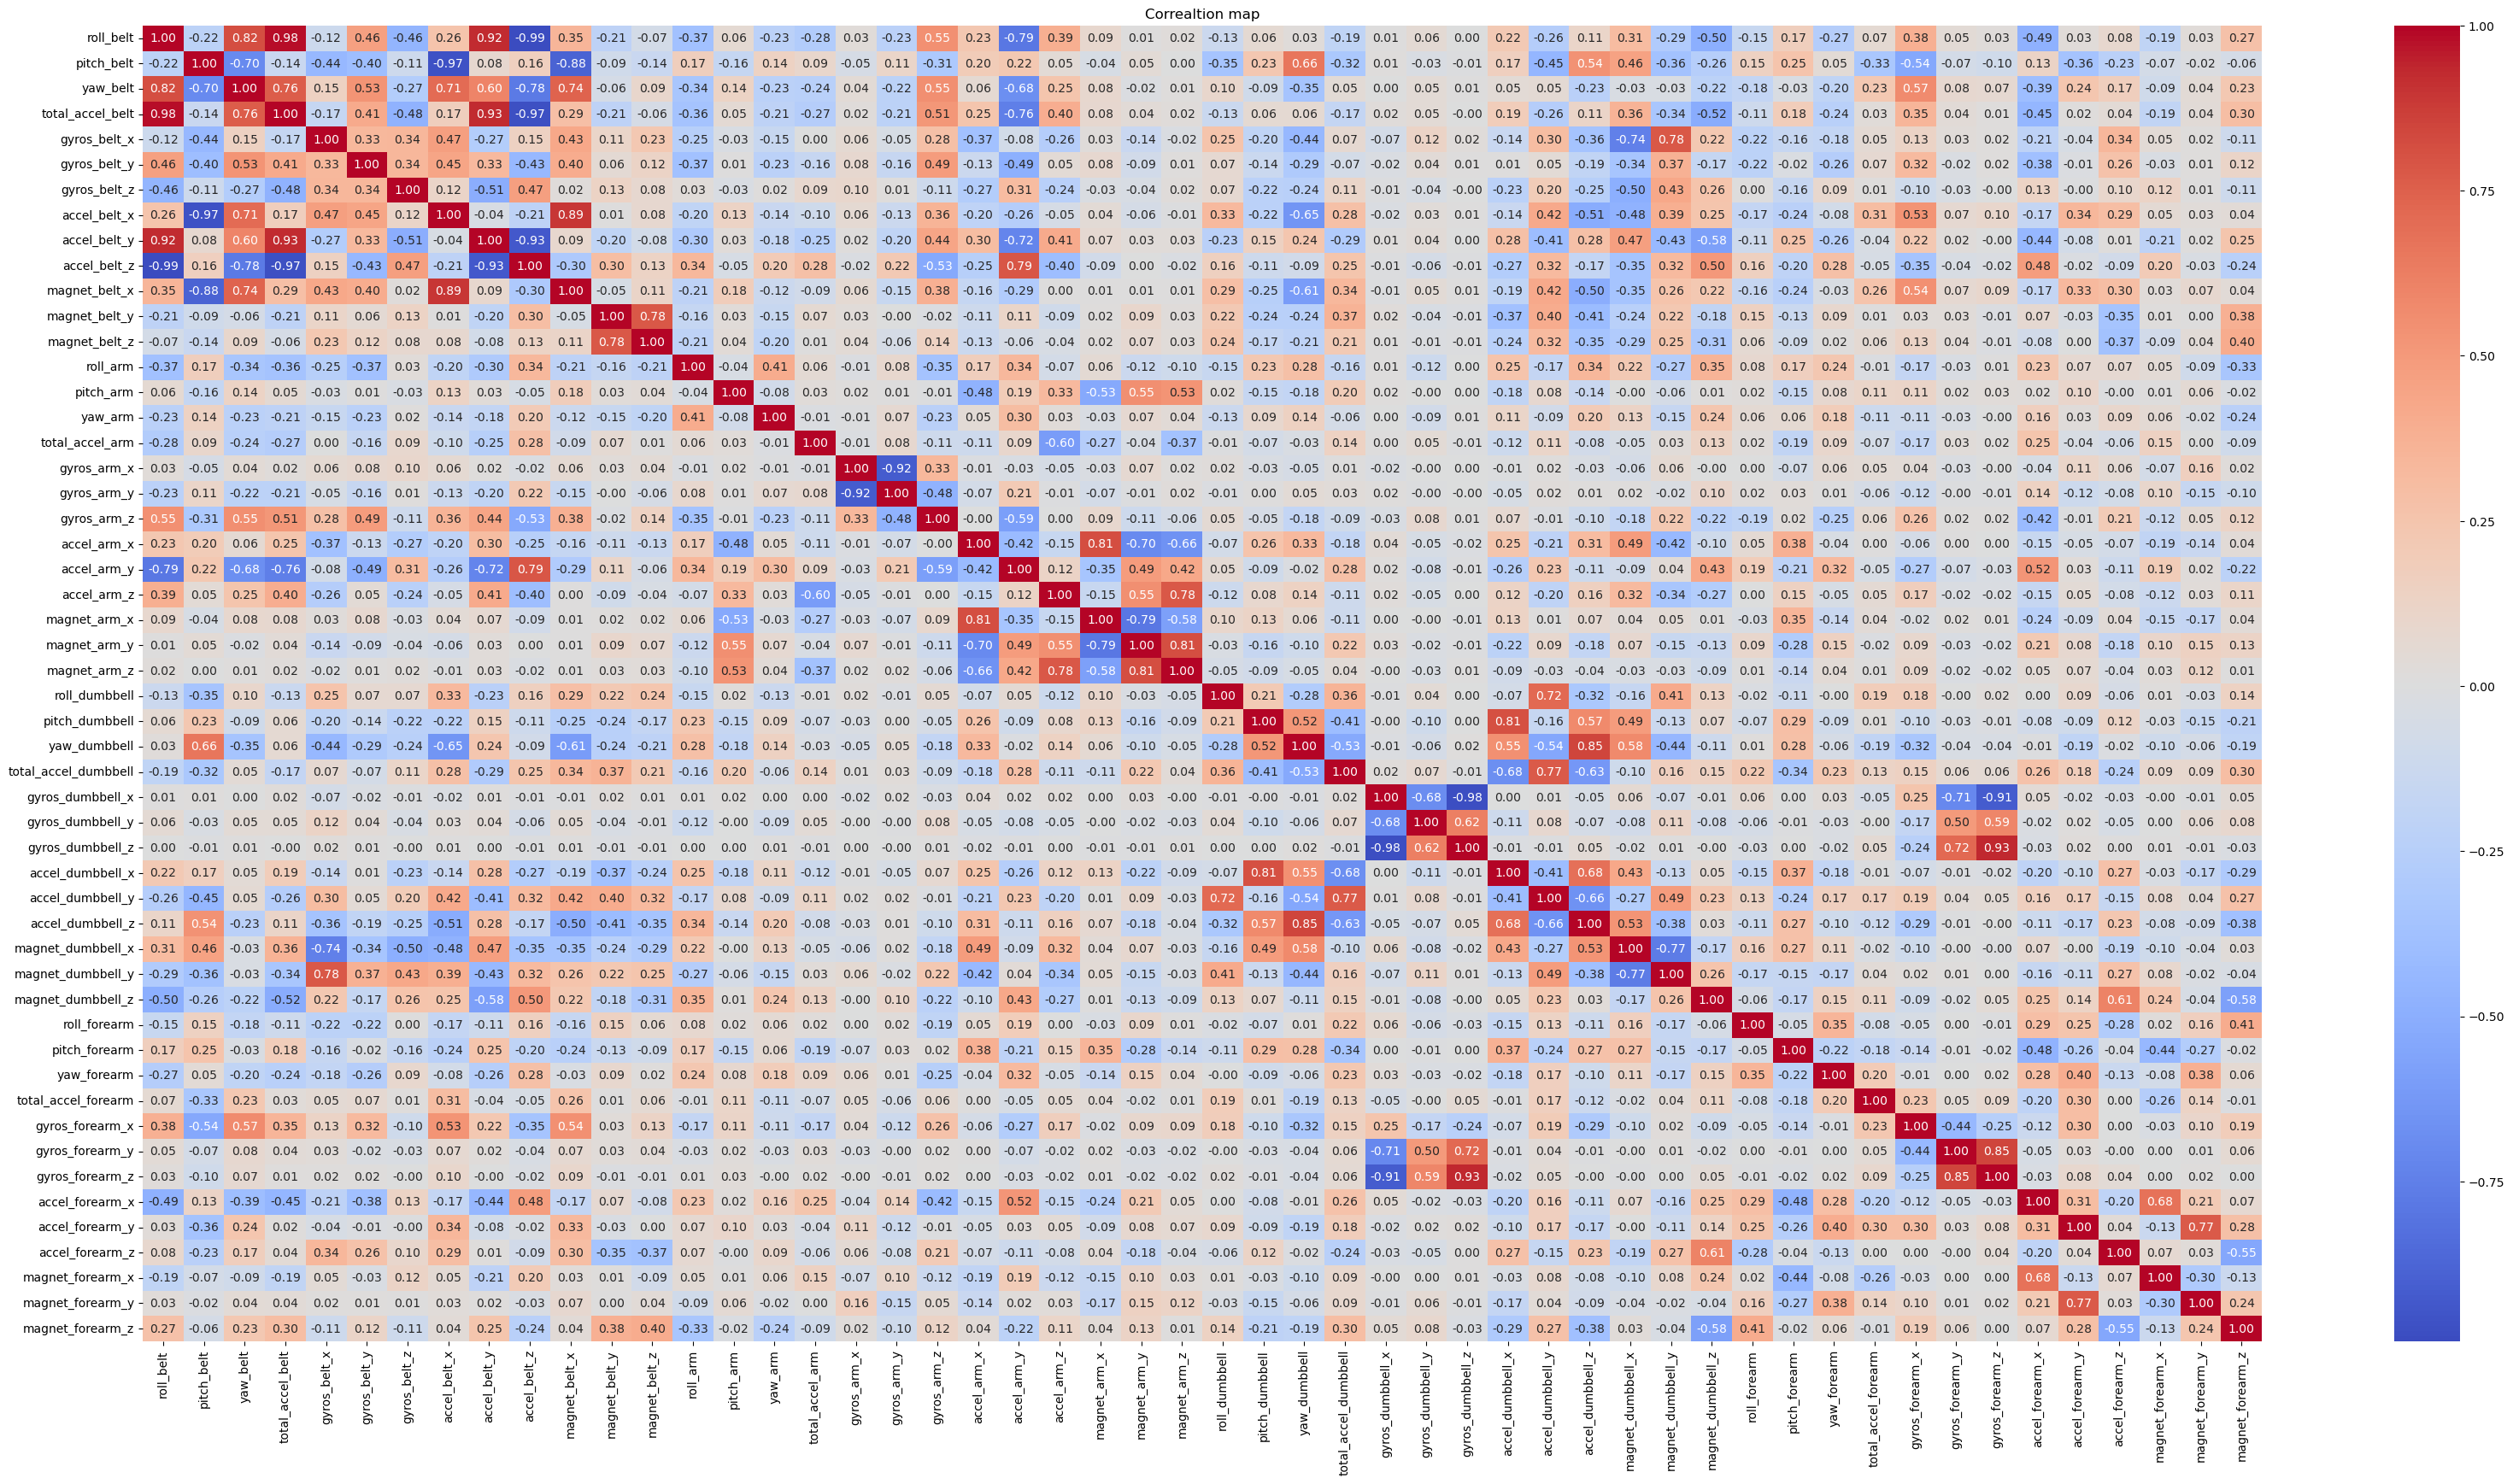

In [140]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correaltion map')
plt.show()

In [141]:
df['classe'].value_counts()

classe
A    5580
B    3797
E    3607
C    3422
D    3216
Name: count, dtype: int64

<Axes: xlabel='classe'>

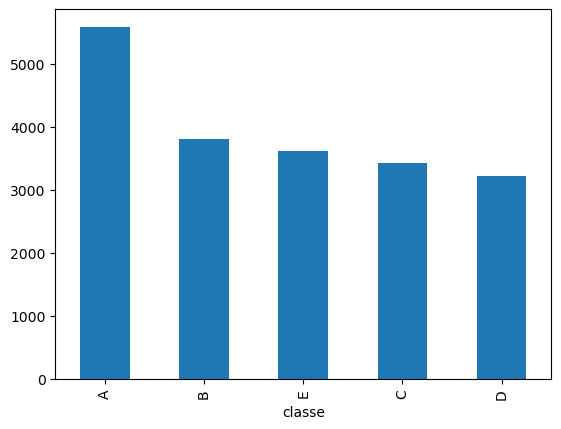

In [142]:
df['classe'].value_counts().plot(kind='bar')

In [143]:
X = df.drop(columns=['classe'])
X = X.select_dtypes(include=['int64', 'float64'])
y = df['classe']

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [147]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           A       0.60      0.69      0.64      1116
           B       0.42      0.40      0.41       760
           C       0.44      0.48      0.46       684
           D       0.49      0.49      0.49       643
           E       0.61      0.47      0.53       722

    accuracy                           0.52      3925
   macro avg       0.51      0.50      0.51      3925
weighted avg       0.52      0.52      0.52      3925



In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))


KNN Classification Report
              precision    recall  f1-score   support

           A       0.98      0.99      0.99      1116
           B       0.98      0.95      0.97       760
           C       0.94      0.97      0.95       684
           D       0.96      0.96      0.96       643
           E       0.99      0.98      0.99       722

    accuracy                           0.97      3925
   macro avg       0.97      0.97      0.97      3925
weighted avg       0.97      0.97      0.97      3925



In [150]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf']
}

grid = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV score: 0.9915271608670861


In [151]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=20,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report
              precision    recall  f1-score   support

           A       0.98      0.98      0.98      1116
           B       0.95      0.95      0.95       760
           C       0.94      0.95      0.95       684
           D       0.96      0.97      0.96       643
           E       0.97      0.98      0.98       722

    accuracy                           0.96      3925
   macro avg       0.96      0.96      0.96      3925
weighted avg       0.96      0.96      0.96      3925



In [152]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1116
           B       1.00      1.00      1.00       760
           C       0.99      1.00      0.99       684
           D       1.00      0.99      1.00       643
           E       1.00      1.00      1.00       722

    accuracy                           1.00      3925
   macro avg       1.00      1.00      1.00      3925
weighted avg       1.00      1.00      1.00      3925



In [153]:
print("Train accuracy:", rf.score(X_train, y_train))
print("Test accuracy :", rf.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy : 0.9974522292993631


In [154]:
from sklearn.model_selection import cross_val_score

models = {
    "Logistic": lr,
    "DecisionTree": dt,
    "RandomForest": rf
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(name, "CV mean:", scores.mean())


C:\Users\Devendra kushwah\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Devendra kushwah\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://s

Logistic CV mean: 0.5221724484959452
DecisionTree CV mean: 0.6629803463254056
RandomForest CV mean: 0.7457955550361325


In [155]:
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [None, 20, 30],
    'min_samples_leaf': [1, 3, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)


0.7487513196595181
{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 400}
